In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

In [3]:
# Local imports.
from analysis import single_cycles
from defaults import PITCH_RATE, SAMPLE_RATE
from synthesis import EnvelopeMorpher, StimulusGenerator
from util import midi_to_hz, time_plot, stft_plot

In [4]:
# Synthesis parameters.
num_partials = 70
midi_pitch = 48
fm_depth = 0.1314
f0 = midi_to_hz(midi_pitch)

In [5]:
# Load env as linear amplitude. (CheapTrick calculates the power spectrum.)
env = single_cycles[0]['env']
env = np.sqrt(env)

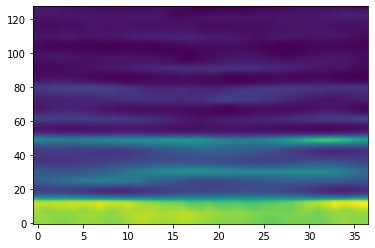

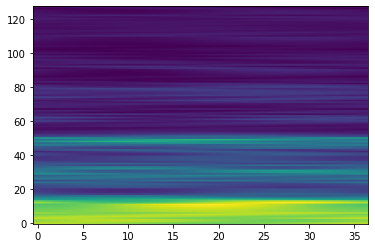

In [41]:
morpher = EnvelopeMorpher(env)

morpher.show(zoom=8)
morpher.rap(max_random_gain=None)
morpher.shuffle_phase(num_shifts=4)
morpher.show(zoom=8)

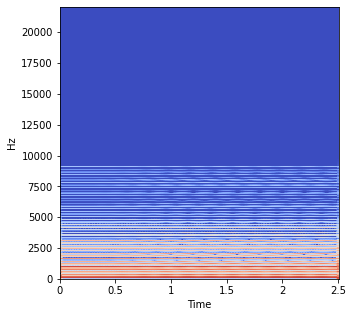

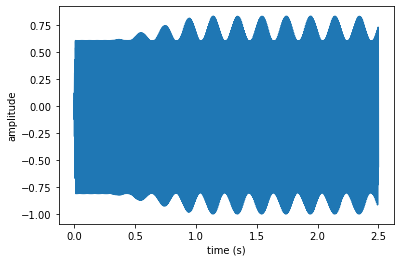

In [42]:
generator = StimulusGenerator(
    sr=SAMPLE_RATE, 
    pr=PITCH_RATE,
    random_rate_upper_limit=7,
    random_rate_lower_limit=4)

# BASIC stimulus.
x = generator(
    f0=f0,
    fm_depth=0,
    env=morpher(),
    num_partials=70,
    length=2.5,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
#     audio_fade=0.1,
#     synth_mode='raf',
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))